BMI > 30 მომხმარებლები:
(1, 56, 'Male', 30.2)
(2, 46, 'Female', 32.0)
(8, 40, 'Female', 30.57)
(9, 28, 'Male', 32.34)
(10, 28, 'Male', 30.07)
(13, 57, 'Male', 43.4)
(24, 29, 'Male', 38.16)
(31, 32, 'Male', 33.4)
(36, 26, 'Male', 42.63)
(38, 35, 'Male', 33.14)
(43, 43, 'Male', 33.8)
(45, 37, 'Male', 40.1)
(50, 31, 'Female', 33.61)
(53, 57, 'Male', 34.18)
(54, 21, 'Male', 32.69)
(56, 23, 'Male', 44.84)
(63, 27, 'Male', 32.93)
(67, 32, 'Male', 33.55)
(70, 40, 'Male', 39.12)
(75, 41, 'Male', 35.86)
(79, 46, 'Male', 33.16)
(91, 25, 'Male', 31.44)
(95, 22, 'Male', 30.3)
(97, 56, 'Male', 40.71)
(98, 58, 'Male', 37.56)
(104, 51, 'Male', 34.5)
(109, 52, 'Female', 31.41)
(119, 18, 'Male', 30.52)
(123, 56, 'Male', 34.06)
(125, 26, 'Male', 30.54)
(129, 59, 'Male', 34.24)
(134, 21, 'Male', 45.43)
(142, 30, 'Female', 30.18)
(143, 49, 'Male', 31.61)
(155, 45, 'Male', 38.78)
(161, 30, 'Male', 39.16)
(171, 59, 'Male', 30.22)
(181, 20, 'Male', 37.87)
(188, 54, 'Male', 31.17)
(194, 43, 'Male', 36.29)
(19

შეიყვანეთ ასაკი:  18
შეიყვანეთ სქესი (Male/Female):  male
შეიყვანეთ წონა (კგ):  79
შეიყვანეთ სიმაღლე (მ):  179
შეიყვანეთ Max_BPM:  150
შეიყვანეთ Avg_BPM:  125
შეიყვანეთ Resting_BPM:  100
შეიყვანეთ ვარჯიშის ხანგრძლივობა (საათებში):  1
შეიყვანეთ კალორიები:  1500


მომხმარებელი წარმატებით დაემატა.


შეიყვანეთ მომხმარებლის ID (rowid):  11
შეიყვანეთ ახალი BMI:  111


მონაცემები განახლდა.


შეიყვანეთ მომხმარებლის ID (rowid), რომლის წაშლაც გსურთ:  11111


ჩანაწერი წაშლილია.


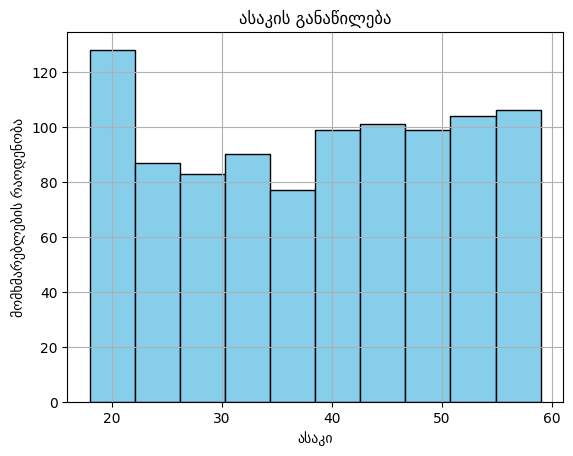

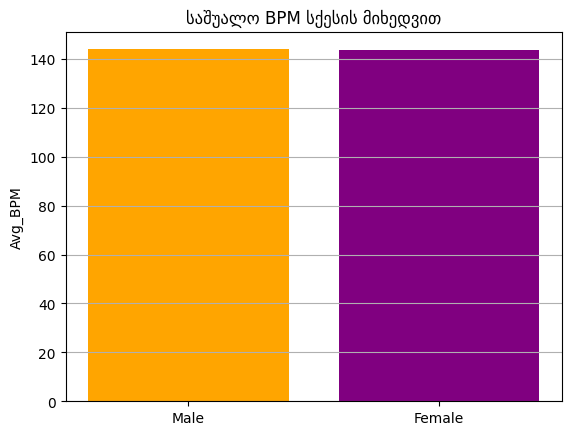

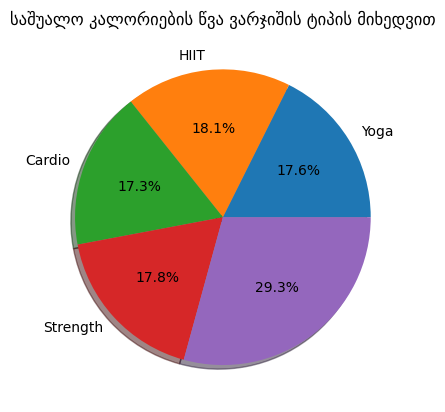

In [2]:
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect("q5-6.sqlite3")
cursor = conn.cursor()

#ინფორმაციის წამოღება ბაზიდან
print("BMI > 30 მომხმარებლები:")
cursor.execute("SELECT rowid, Age, Gender, BMI FROM gym_members_exercise_tracking WHERE BMI > 30")
rows = cursor.fetchall()
for row in rows:
    print(row)

#ახალი ჩანაწერის დამატება
age = int(input("შეიყვანეთ ასაკი: "))
gender = input("შეიყვანეთ სქესი (Male/Female): ")
weight = float(input("შეიყვანეთ წონა (კგ): "))
height = float(input("შეიყვანეთ სიმაღლე (მ): "))
max_bpm = int(input("შეიყვანეთ Max_BPM: "))
avg_bpm = int(input("შეიყვანეთ Avg_BPM: "))
resting_bpm = int(input("შეიყვანეთ Resting_BPM: "))
session_duration = float(input("შეიყვანეთ ვარჯიშის ხანგრძლივობა (საათებში): "))
calories_burned = int(input("შეიყვანეთ კალორიები: "))
bmi = round(weight / (height ** 2), 2)

cursor.execute("""
    INSERT INTO gym_members_exercise_tracking (
        Age, Gender, "Weight (kg)", "Height (m)", Max_BPM, Avg_BPM,
        Resting_BPM, "Session_Duration (hours)", Calories_Burned, BMI
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", (
    age, gender, weight, height, max_bpm, avg_bpm, resting_bpm,
    session_duration, calories_burned, bmi
))

print("მომხმარებელი წარმატებით დაემატა.")

# ჩანაწერის განახლება
user_id = int(input("შეიყვანეთ მომხმარებლის ID (rowid): "))
new_bmi = float(input("შეიყვანეთ ახალი BMI: "))

cursor.execute("UPDATE gym_members_exercise_tracking SET BMI = ? WHERE rowid = ?", (new_bmi, user_id))
conn.commit()
print("მონაცემები განახლდა.")

#ჩანაწერის წაშლა
delete_id = int(input("შეიყვანეთ მომხმარებლის ID (rowid), რომლის წაშლაც გსურთ: "))
cursor.execute("DELETE FROM gym_members_exercise_tracking WHERE rowid = ?", (delete_id,))
conn.commit()
print("ჩანაწერი წაშლილია.")

#გრაფიკები

# ჰისტოგრამა – ასაკის განაწილება
cursor.execute("SELECT Age FROM gym_members_exercise_tracking")
ages = [row[0] for row in cursor.fetchall()]

plt.hist(ages, bins=10, color="skyblue", edgecolor="black")
plt.title("ასაკის განაწილება")
plt.xlabel("ასაკი")
plt.ylabel("მომხმარებლების რაოდენობა")
plt.grid(True)
plt.show()

# სქესის მიხედვით საშუალო BPM
cursor.execute("SELECT Gender, Avg_BPM FROM gym_members_exercise_tracking")
gender_data = cursor.fetchall()

male_bpms = [bpm for gender, bpm in gender_data if gender == 'Male']
female_bpms = [bpm for gender, bpm in gender_data if gender == 'Female']

avg_male_bpm = sum(male_bpms) / len(male_bpms) if male_bpms else 0
avg_female_bpm = sum(female_bpms) / len(female_bpms) if female_bpms else 0

plt.bar(["Male", "Female"], [avg_male_bpm, avg_female_bpm], color=["orange", "purple"])
plt.title("საშუალო BPM სქესის მიხედვით")
plt.ylabel("Avg_BPM")
plt.grid(axis="y")
plt.show()

# Pie დიაგრამა: ვარჯიშის ტიპის მიხედვით საშუალო კალორიების წვა
cursor.execute("SELECT Workout_Type, Calories_Burned FROM gym_members_exercise_tracking")
workout_data = cursor.fetchall()

workout_sums = {}
workout_counts = {}

for workout, calories in workout_data:
    if workout not in workout_sums:
        workout_sums[workout] = 0
        workout_counts[workout] = 0
    workout_sums[workout] += calories
    workout_counts[workout] += 1

labels = []
avg_cals = []

for workout in workout_sums:
    labels.append(workout)
    avg_cals.append(workout_sums[workout] / workout_counts[workout])

plt.pie(avg_cals, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("საშუალო კალორიების წვა ვარჯიშის ტიპის მიხედვით")
plt.show()


conn.close()